In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import torch

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-18 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


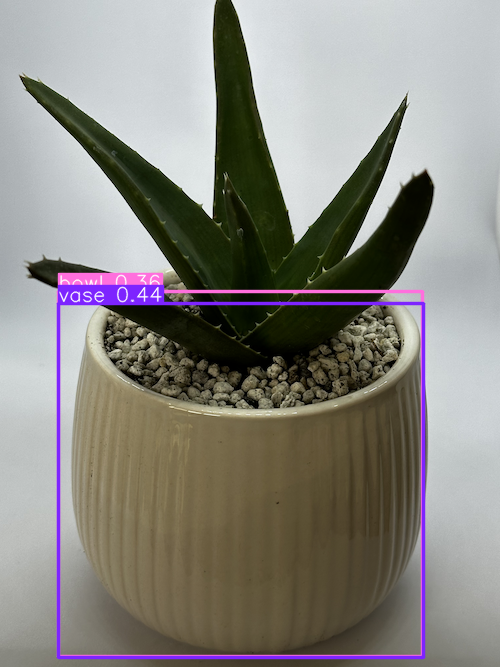

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.conf = 0.25
model.iou = 0.45
model.max_det = 100

def load_image_pixels(filename, shape):
    image = Image.open(filename)
    image = image.resize(shape)
    image = np.asarray(image)
    image = image.astype('float32')
    image /= 255.0
    image = np.expand_dims(image, 0)
    return image

image_path = 'planta.png'
input_w, input_h = 416, 416
image = load_image_pixels(image_path, (input_w, input_h))

results = model(image_path)

def draw_boxes(results):
    results.show()

draw_boxes(results)
